In [14]:
# Install packages if not already installed (uncomment if needed)
# install.packages(c("readr", "dplyr", "lubridate", "ggplot2"))

# Load libraries
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)


In [15]:
# Load dataset from Kaggle input folder
data <- read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

# Preview dataset
head(data)


Rows: 577462 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl  (2): AverageTemperature, AverageTemperatureUncertainty
date (1): dt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dt,AverageTemperature,AverageTemperatureUncertainty,Country
<date>,<dbl>,<dbl>,<chr>
1743-11-01,4.384,2.294,Åland
1743-12-01,NA,NA,Åland
1744-01-01,NA,NA,Åland
1744-02-01,NA,NA,Åland
1744-03-01,NA,NA,Åland
1744-04-01,1.530,4.680,Åland


In [16]:
# Remove missing values and convert dt column to Date
data_clean <- data %>%
  filter(!is.na(AverageTemperature)) %>%
  mutate(dt = as.Date(dt))

# Check cleaned data
summary(data_clean)


       dt             AverageTemperature AverageTemperatureUncertainty
 Min.   :1743-11-01   Min.   :-37.66     Min.   : 0.052               
 1st Qu.:1869-11-01   1st Qu.: 10.03     1st Qu.: 0.323               
 Median :1919-08-01   Median : 20.90     Median : 0.571               
 Mean   :1913-08-08   Mean   : 17.19     Mean   : 1.019               
 3rd Qu.:1966-10-01   3rd Qu.: 25.81     3rd Qu.: 1.207               
 Max.   :2013-09-01   Max.   : 38.84     Max.   :15.003               
   Country         
 Length:544811     
 Class :character  
 Mode  :character  
                   
                   
                   

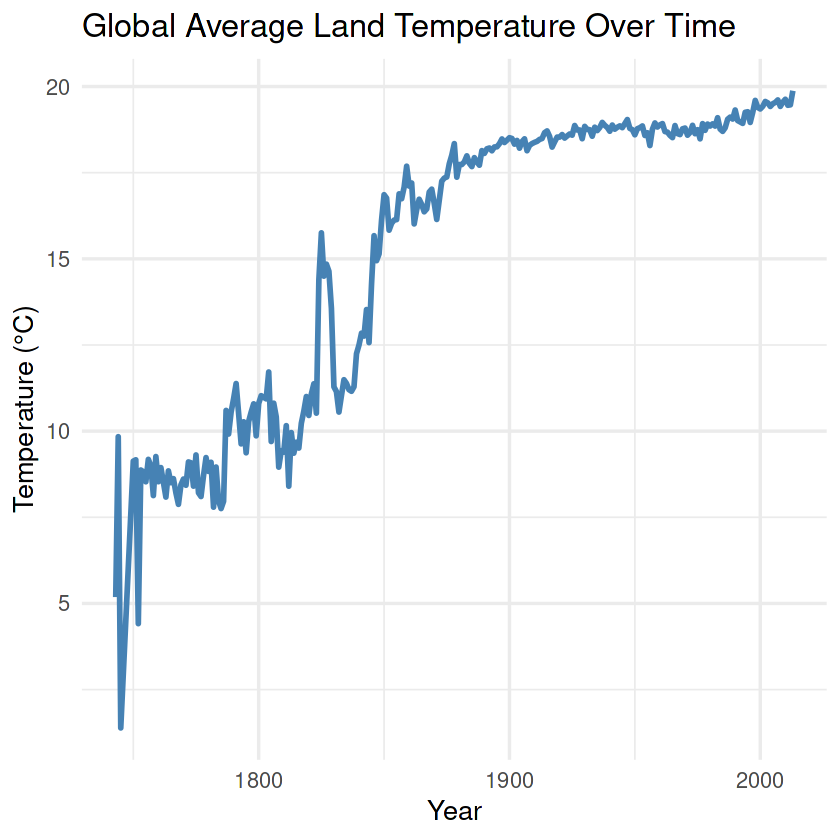

In [17]:
# Aggregate by year
global_trend <- data_clean %>%
  mutate(year = year(dt)) %>%
  group_by(year) %>%
  summarise(global_avg_temp = mean(AverageTemperature, na.rm = TRUE))

# Plot global trend
ggplot(global_trend, aes(x = year, y = global_avg_temp)) +
  geom_line(color = "steelblue", size = 1.2) +
  labs(title = "Global Average Land Temperature Over Time",
       x = "Year", y = "Temperature (°C)") +
  theme_minimal(base_size = 16)


`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


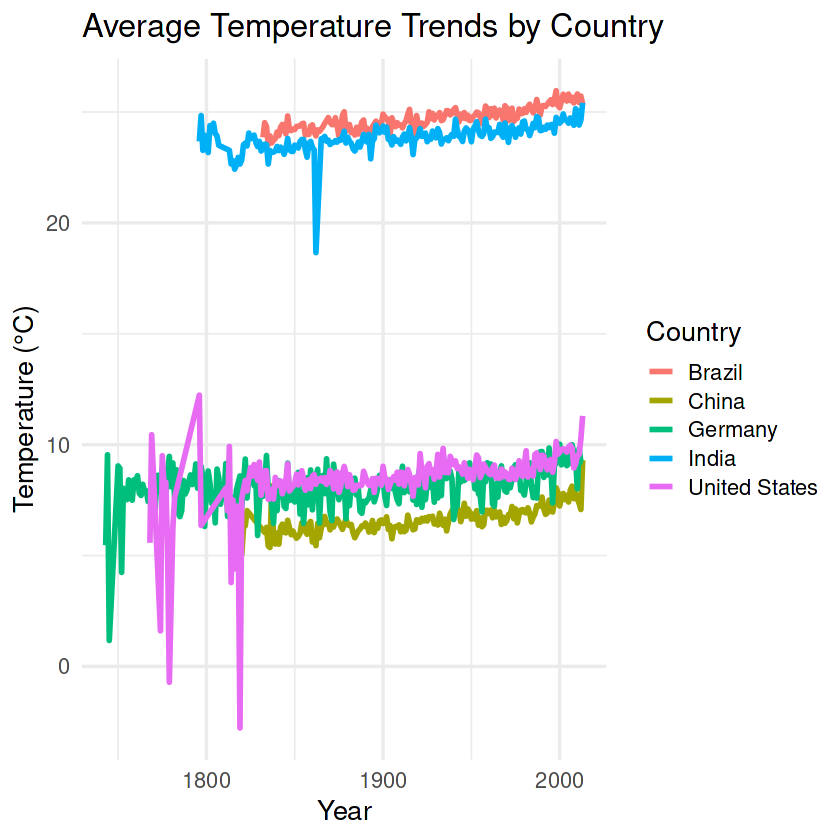

In [18]:
# Select some countries for comparison
countries <- c("India", "United States", "China", "Brazil", "Germany")

country_trends <- data_clean %>%
  mutate(year = year(dt)) %>%
  filter(Country %in% countries) %>%
  group_by(Country, year) %>%
  summarise(avg_temp = mean(AverageTemperature, na.rm = TRUE))

# Plot
ggplot(country_trends, aes(x = year, y = avg_temp, color = Country, group = Country)) +
  geom_line(size = 1.2) +
  labs(title = "Average Temperature Trends by Country",
       x = "Year", y = "Temperature (°C)") +
  theme_minimal(base_size = 16)


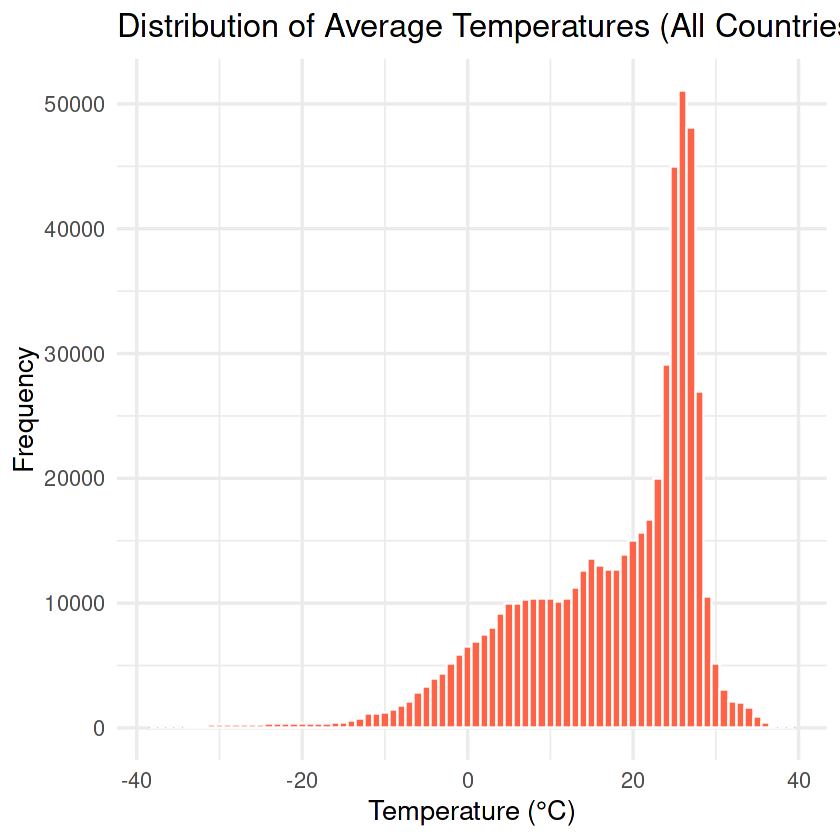

In [19]:
ggplot(data_clean, aes(x = AverageTemperature)) +
  geom_histogram(binwidth = 1, fill = "tomato", color = "white") +
  labs(title = "Distribution of Average Temperatures (All Countries)",
       x = "Temperature (°C)", y = "Frequency") +
  theme_minimal(base_size = 16)


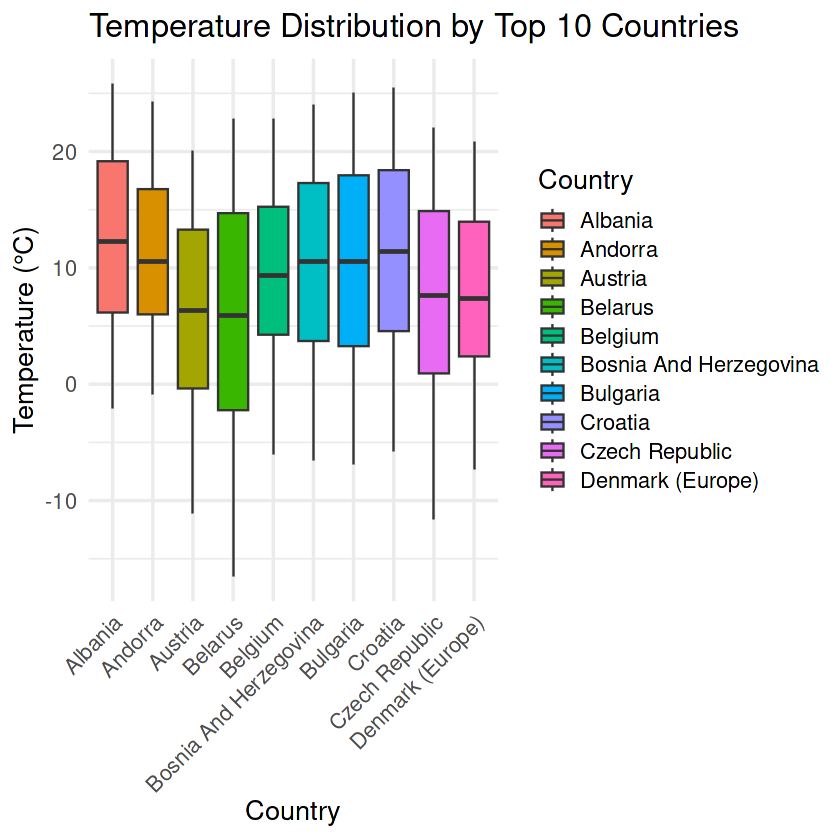

In [20]:
# Find top 10 countries with most records
top_countries <- data_clean %>%
  group_by(Country) %>%
  summarise(records = n()) %>%
  arrange(desc(records)) %>%
  head(10) %>%
  pull(Country)

# Filter only those countries
data_top <- data_clean %>%
  filter(Country %in% top_countries)

# Boxplot
ggplot(data_top, aes(x = Country, y = AverageTemperature, fill = Country)) +
  geom_boxplot() +
  labs(title = "Temperature Distribution by Top 10 Countries",
       x = "Country", y = "Temperature (°C)") +
  theme_minimal(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


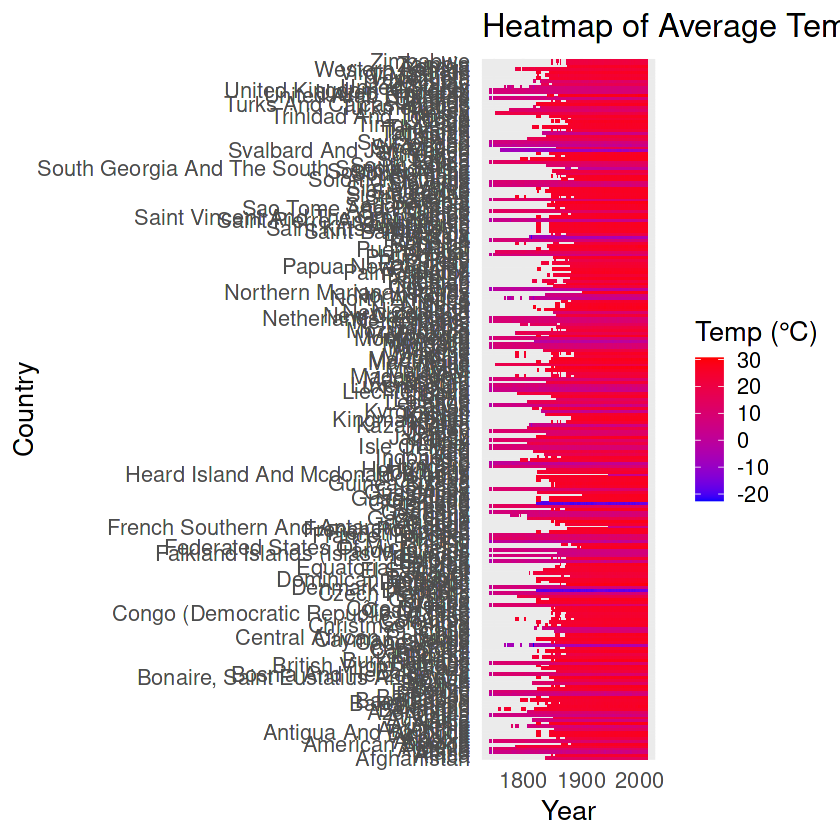

In [21]:
# Average by country & year
country_year_avg <- data_clean %>%
  mutate(year = year(dt)) %>%
  group_by(Country, year) %>%
  summarise(avg_temp = mean(AverageTemperature, na.rm = TRUE))

# Heatmap
ggplot(country_year_avg, aes(x = year, y = Country, fill = avg_temp)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Heatmap of Average Temperatures by Country and Year",
       x = "Year", y = "Country", fill = "Temp (°C)") +
  theme_minimal(base_size = 16)
